# Table of Contents

1. Library Import and Data Upload
2. Data Transformation Preparation
3. 2019 Optimization Visualizations (Stockholm, Heathrow, and Madrid)
4. 2009 Optimization Visualizations (Stockholm, Heathrow, and Madrid)
5. 1999 Optimization Visualizations (Stockholm, Heathrow, and Madrid)
6. Summary

## 1. Import Libraries and Data

In [28]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

In [30]:
df_climate_scaled = pd.read_csv('/Users/samabrams/Data Analysis Projects/ClimateWins ML Project/02 Data/Prepared Data/weather_scaled.csv')

In [32]:
df_climate_scaled.head()

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [34]:
df_climate_scaled = df_climate_scaled.drop('Unnamed: 0', axis=1)

In [36]:
df_climate_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [38]:
df_climate_scaled.shape

(22950, 170)

## 2. Data Transformation and Preparation

In [40]:
# Filter for only the necessary temperature columns

df_climate = df_climate_scaled[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [42]:
df_climate

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19600101,1,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.927601,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-1.280450,-0.124331,-0.391072,-0.257321,-0.668215
1,19600102,1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.825294,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.539569,-0.650834,-0.415953,-0.335759,-0.548046
2,19600103,1,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.940389,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.876333,-0.650834,-0.615003,-0.210258,-0.067372
3,19600104,1,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-1.042696,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.775304,-0.943336,-0.764290,-0.069069,-0.998679
4,19600105,1,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.978754,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.926848,-0.621584,-0.503037,-0.037694,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,0.747959,0.628750,-0.005167,0.898267,1.042841,0.440753,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,-0.000746,0.826301,0.517090,1.295755,-0.007287
22946,20221028,10,0.856604,0.367720,-0.005167,0.945734,1.278467,0.466330,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,-0.000746,1.074927,0.641496,1.358505,-0.007287
22947,20221029,10,0.856604,0.083991,-0.005167,0.914089,1.101748,0.786039,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,-0.000746,1.221178,0.716139,1.405568,-0.007287
22948,20221030,10,0.680055,0.265577,-0.005167,0.692578,0.880848,0.376811,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,-0.000746,1.235803,0.019467,0.668249,-0.007287


In [44]:
# Filter the dataframe to include only records from the year 2019
df_climate_2019 = df_climate[df_climate['DATE'].astype(str).str.startswith('2019')]

In [46]:
df_climate_2019.shape

(365, 20)

In [48]:
df_climate_2019

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
21550,20190101,1,-0.732333,-1.232510,-1.052110,-0.367511,-0.562362,-0.352125,-0.595665,-0.005705,-1.031772,-0.592185,-1.123071,-0.617629,-0.210845,-0.000746,-0.533833,-0.391072,-0.712262,-0.007287
21551,20190102,1,-0.963204,-1.107669,-0.993293,-0.731423,-0.989434,-0.786929,-1.084860,-0.005705,-1.043881,-1.042277,-1.203946,-1.082622,-0.659834,-0.000746,-1.382089,-1.037982,-0.916201,-0.007287
21552,20190103,1,-1.452108,-1.527588,-1.475592,-0.952934,-1.048340,-0.953178,-1.102331,-0.005705,-1.104426,-1.042277,-1.028718,-1.371671,-0.659834,-0.000746,-2.508221,-1.212150,-1.324080,-0.007287
21553,20190104,1,-1.424946,-1.856713,-1.534409,-0.778890,-1.151427,-0.978754,-1.434286,-0.005705,-1.395042,-1.147298,-1.217425,-1.271132,-0.502081,-0.000746,-2.230344,-0.577681,-1.449581,-0.007287
21554,20190105,1,-1.126172,-1.731872,-1.216797,-0.478267,-0.709628,-0.607892,-1.259573,-0.005705,-1.479805,-0.757219,-1.284820,-1.132891,-0.380732,-0.000746,-1.528340,-0.838933,-1.433893,-0.007287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,12,-0.487881,-1.084971,-0.863895,-1.063690,-0.945254,-0.595104,-0.648078,-0.005705,-0.934900,-0.697206,-0.813052,-0.667898,-1.375790,-0.000746,-0.884835,-1.013101,-0.084757,-0.007287
21911,20191228,12,-0.908881,-1.209812,-1.110927,-1.601646,-1.490139,-0.722987,-0.543251,-0.005705,-1.213407,-1.237316,-0.907406,-1.145458,-0.926801,-0.000746,-1.294338,-1.174829,-0.461260,-0.007287
21912,20191229,12,-1.520011,-1.368700,-1.287378,-1.395957,-1.225060,-0.799717,-0.438423,-0.005705,-1.467696,-1.357341,-0.961322,-1.333969,-0.247249,-0.000746,-1.440589,-0.565240,-1.277017,-0.007287
21913,20191230,12,-1.343462,-1.607032,-1.299141,-0.858001,-0.901074,-0.556739,-0.822791,-0.005705,-1.576677,-0.772222,-1.069155,-1.132891,-0.113766,-0.000746,-0.738584,0.094110,-1.449581,-0.007287


In [50]:
# Drop DATE and MONTH columns since they aren't scaled with the rest of the data
df_2019 = df_climate_2019.drop(['DATE','MONTH'], axis=1)

In [177]:
# Repeating the process above to get dataframes for 2009 and 1999

# Filter the dataframe to include only records from the year 2009
df_climate_2009 = df_climate[df_climate['DATE'].astype(str).str.startswith('2009')]

# Drop DATE and MONTH columns
df_2009 = df_climate_2009.drop(['DATE','MONTH'], axis=1)

df_2009

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
17898,-1.207656,-1.913459,-2.063762,-1.680757,-2.064478,-1.208945,-1.696355,-2.087786,-1.491914,-2.092490,-0.826531,-1.145458,-1.557813,-0.910009,-1.001836,-1.510724,-1.731958,-0.668215
17899,-1.547172,-1.902110,-1.734387,-1.712401,-1.711039,-1.541442,-1.364400,-1.762922,-1.600895,-1.702411,-0.718699,-1.597884,-1.606353,-1.431994,-1.089587,-1.697333,-1.888835,-1.088805
17900,-1.832366,-1.902110,-1.757914,-2.013024,-2.211744,-1.541442,-1.801182,-2.501249,-1.806748,-2.047481,-0.934364,-1.836664,-1.363655,-1.448832,-1.513715,-1.498284,-1.857459,-1.178932
17901,-1.913850,-2.151791,-1.816731,-1.221912,-1.578499,-1.848362,-2.342792,-1.585724,-2.170018,-1.642398,-1.230904,-1.685856,-1.861184,-1.819273,-1.601465,-2.145194,-2.202587,-1.178932
17902,-1.968172,-1.936157,-1.640280,-1.775690,-1.917211,-2.717970,-2.063251,-1.851522,-2.036819,-1.957463,-1.527444,-1.635586,-1.970398,-1.903464,-1.542965,-2.070550,-2.516340,-1.088805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,-1.275559,-0.982829,-1.052110,-0.921290,-1.092520,-0.825294,-0.927619,-1.364226,-0.947009,-1.027273,-1.500486,-1.032352,-1.642757,-1.465670,-1.250463,-1.535605,-1.104453,-1.058763
18259,-0.976785,-0.994178,-0.969766,-1.174445,-1.077794,-1.093849,-1.661412,-1.127962,-1.237625,-1.132295,-1.028718,-0.868976,-2.006803,-1.431994,-1.469839,-0.776730,-0.853451,-1.779775
18260,-0.800236,-0.835290,-1.005056,-1.490890,-1.254513,-1.068273,-1.626469,-1.497125,-1.043881,-1.267322,-0.395200,-0.881544,-2.370848,-0.556407,-0.855585,-1.908823,-0.194570,-2.200365
18261,-0.257010,-0.052199,-1.169744,-1.538357,-0.871621,-1.630960,-1.154745,-0.921230,-0.583739,-0.502167,-0.705220,-0.127501,-2.686354,-0.118614,-0.226706,-2.095431,-0.257321,-2.290492


In [179]:
# Filter the dataframe to include only records from the year 2009
df_climate_1999 = df_climate[df_climate['DATE'].astype(str).str.startswith('1999')]

# Drop DATE and MONTH columns
df_1999 = df_climate_1999.drop(['DATE','MONTH'], axis=1)

df_1999

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
14245,-1.370624,-1.425445,-1.746150,-0.668134,-0.753808,-1.260098,-0.351067,-1.260860,-1.286061,-0.352136,-1.338737,-1.183161,-0.744778,-0.657436,-0.723959,-0.851374,-0.665199,-0.848468
14246,-1.031107,-1.005527,-1.522646,-0.573200,-0.665448,-1.515865,-0.508308,-0.995063,-1.164971,-0.442155,-1.527444,-0.994650,-0.720508,-0.657436,-0.533833,-0.776730,-0.586761,-0.848468
14247,-0.352074,-1.028225,-1.040346,-0.699778,-0.709628,-1.247310,-0.420952,-0.699732,-0.995445,-0.622191,-1.419611,-0.253175,-0.502081,-1.061553,-0.636209,-0.627443,-0.414197,-0.487962
14248,-0.161945,-1.277907,-0.922712,0.012222,-0.032203,-1.119426,-0.228768,-0.153371,-1.007554,0.067949,-1.500486,-0.026962,-0.562755,-1.128906,-0.402207,-0.652324,-0.100445,-0.217583
14249,-0.094042,-0.926083,-1.110927,0.233733,0.218150,-0.224241,0.208014,0.186260,-1.237625,0.353007,-0.934364,-0.202905,-0.732643,-1.044715,0.329047,-0.577681,-0.053382,-0.638173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,-0.732333,-0.971480,-0.910949,-0.984579,-1.121973,-1.145003,-1.399343,-1.127962,-0.959118,-1.042277,-0.476075,-0.856409,-0.696239,-0.303834,-1.352838,-0.789171,-0.790700,-1.779775
14606,-1.085430,-0.903385,-1.310904,-1.348490,-1.195607,-0.965966,-1.364400,-1.127962,-1.189189,-1.177304,-0.988280,-1.145458,-0.878261,-0.758466,-1.440589,-0.963339,-1.182891,-1.629564
14607,-1.166914,-1.209812,-1.193270,-1.079512,-1.166153,-1.311252,-1.608998,-1.039362,-1.540350,-1.177304,-1.554402,-1.183161,-1.205902,-1.768758,-1.923217,-1.174829,-1.386830,-1.088805
14608,-1.261978,-1.402747,-1.169744,-1.126979,-1.077794,-1.183368,-1.364400,-1.172261,-1.721985,-1.147298,-1.567881,-1.208295,-1.921859,-0.000746,-2.010968,-1.734655,-1.371143,-0.698257


## 3. Visualizations - 2019

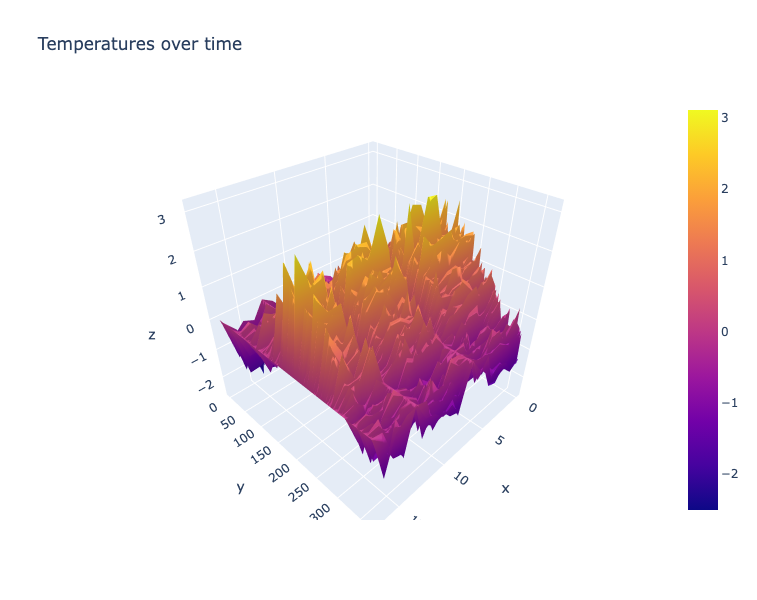

In [182]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

fig2019 = go.Figure(data=[go.Surface(z=df_2019.values)])
fig2019.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig2019.show()

In [56]:
# Make an index for the year
i = np.arange(0.01,3.66,0.01)
index = pd.DataFrame(data = i, columns = ['index'])
index

,index
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05
...,...
360,3.61
361,3.62
362,3.63
363,3.64


In [62]:
n_rows = df_climate_2019.shape[0]
n_rows

365

In [64]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_2019['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows,1)

In [66]:
X.shape, y.shape

((365, 2), (365, 1))

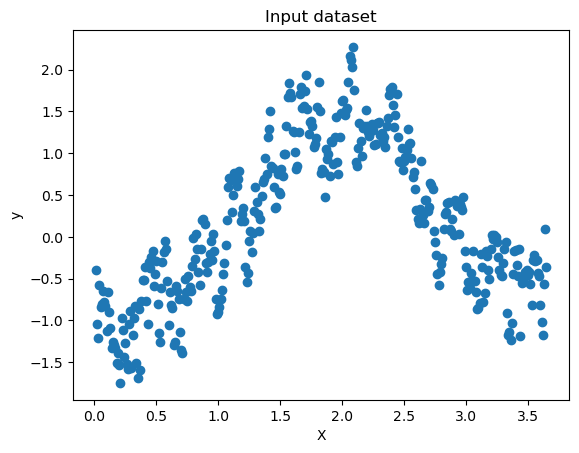

In [68]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df_2019['STOCKHOLM_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [74]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
df_2019['STOCKHOLM_temp_mean'].min()

-1.7470952320682225

In [76]:
#what is the MSC temperature? (Note gradient descent is not actually finding this number)
df_2019['STOCKHOLM_temp_mean'].max()

2.271211659250307

In [78]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [80]:
compute_cost(X,y)

array([0.43474191])

In [82]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [168]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=500 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.0035 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 177 ms, sys: 5.41 ms, total: 182 ms
Wall time: 186 ms


In [170]:
theta

array([[ 0.28392567],
       [-0.00811538]])

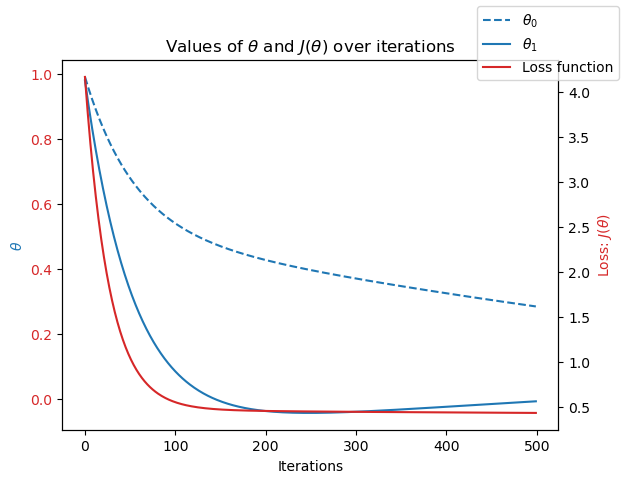

In [172]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

### Madrid, 2019

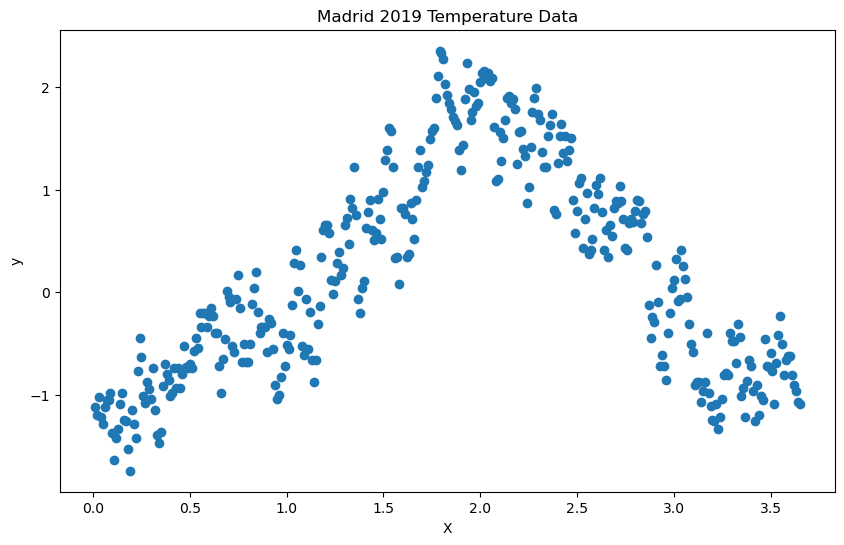

In [185]:
# This will translate your chosen weather data into the X and y datasets needed for the optimization function.
X = index.to_numpy().reshape(n_rows, 1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)
y = df_2019['MADRID_temp_mean'].to_numpy().reshape(n_rows, 1)

# Look at one year of temperature data over time
plt.figure(figsize=(10, 6))
plt.scatter(x=index['index'], y=df_2019['MADRID_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Madrid 2019 Temperature Data');
plt.show()

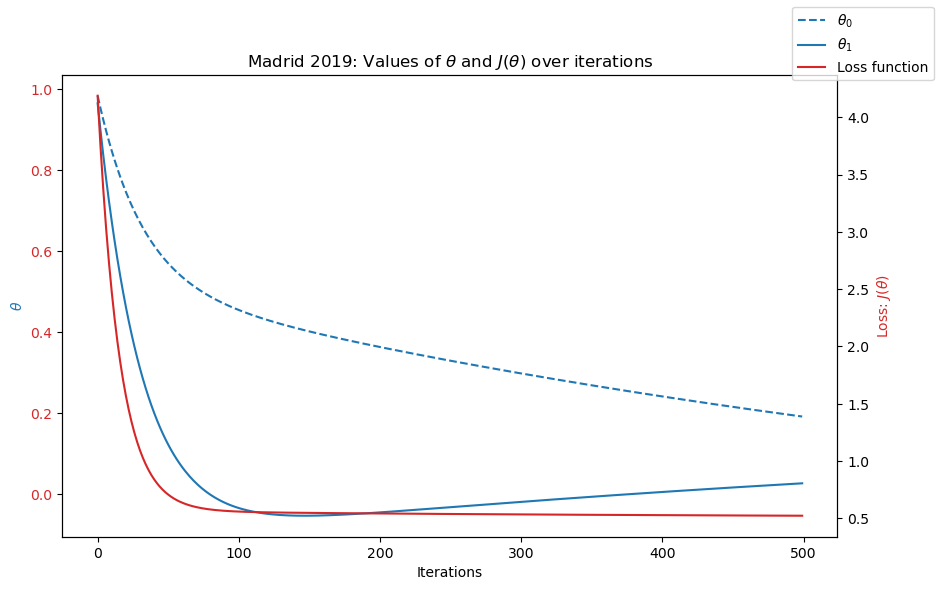

Final theta values for Madrid 2019: theta0 = 0.19197308696922052, theta1 = 0.02705560356217437
Final loss value: 0.5224776985634335
CPU times: user 428 ms, sys: 15.5 ms, total: 443 ms
Wall time: 351 ms


In [193]:
%%time
# This runs your data through a gradient descent for the starting conditions in 'theta_init.'
num_iterations = 500
theta_init = np.array([[1], [1]])
alpha = 0.006
theta, J_history, theta0_history, theta1_history = gradient_descent(X, y, theta_init,
                                                                   alpha, num_iterations)

# Plot the optimization results
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot thetas over time
color = 'tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Madrid 2019: Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.legend();
plt.show()

print(f"Final theta values for Madrid 2019: theta0 = {theta[0][0]}, theta1 = {theta[1][0]}")
print(f"Final loss value: {J_history[-1]}")

### Heathrow 2019

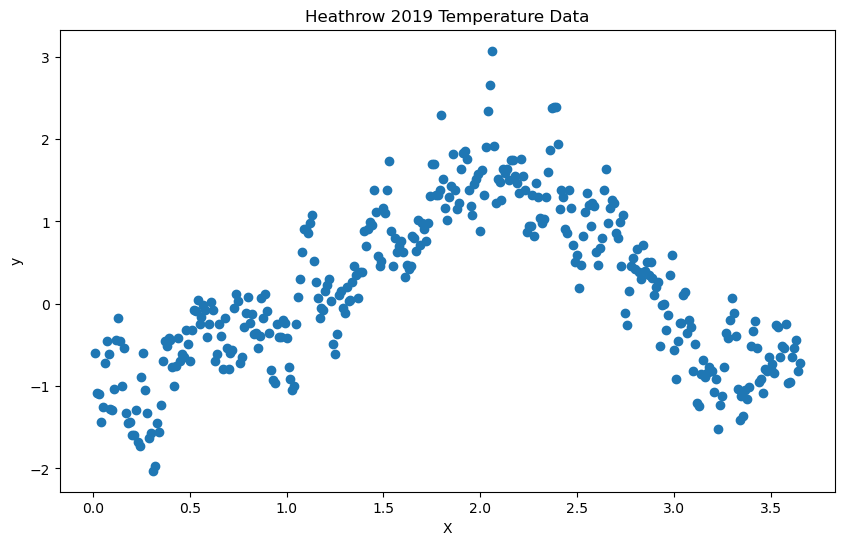

In [196]:
# This will translate your chosen weather data into the X and y datasets needed for the optimization function.
X = index.to_numpy().reshape(n_rows, 1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)
y = df_2019['HEATHROW_temp_mean'].to_numpy().reshape(n_rows, 1)

# Look at one year of temperature data over time
plt.figure(figsize=(10, 6))
plt.scatter(x=index['index'], y=df_2019['HEATHROW_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Heathrow 2019 Temperature Data');
plt.show()

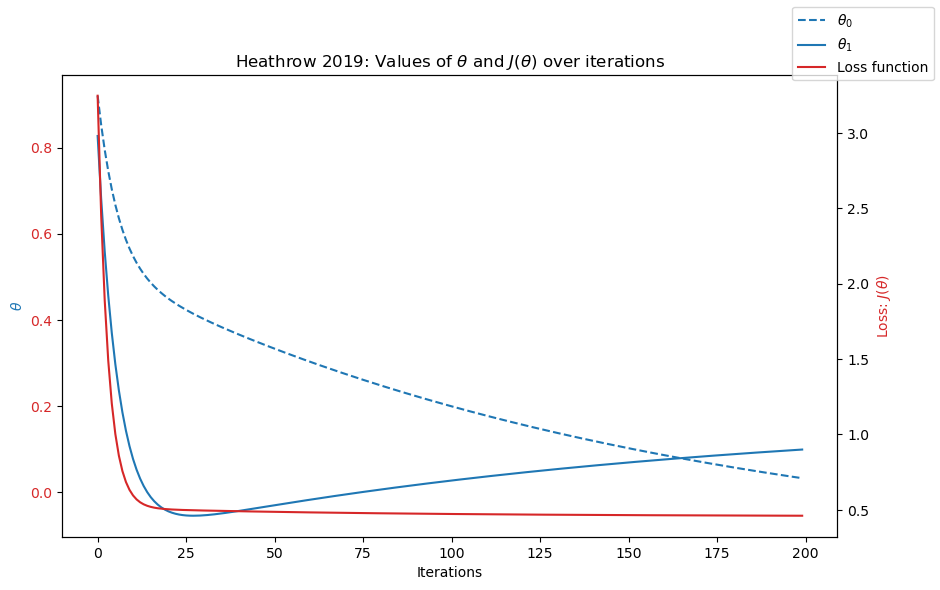

Final theta values for Heathrow 2019: theta0 = 0.031976591768534394, theta1 = 0.09849045485717428
Final loss value: 0.46132431385931083
CPU times: user 354 ms, sys: 20.2 ms, total: 374 ms
Wall time: 203 ms


In [208]:
%%time
# This runs your data through a gradient descent for the starting conditions in 'theta_init.'
num_iterations = 200
theta_init = np.array([[1], [1]])
alpha = 0.03
theta, J_history, theta0_history, theta1_history = gradient_descent(X, y, theta_init,
                                                                   alpha, num_iterations)

# Plot the optimization results
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot thetas over time
color = 'tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)
# plot loss function over time
color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Heathrow 2019: Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.legend();
plt.show()

print(f"Final theta values for Heathrow 2019: theta0 = {theta[0][0]}, theta1 = {theta[1][0]}")
print(f"Final loss value: {J_history[-1]}")

## 4. 2009 Visualizations

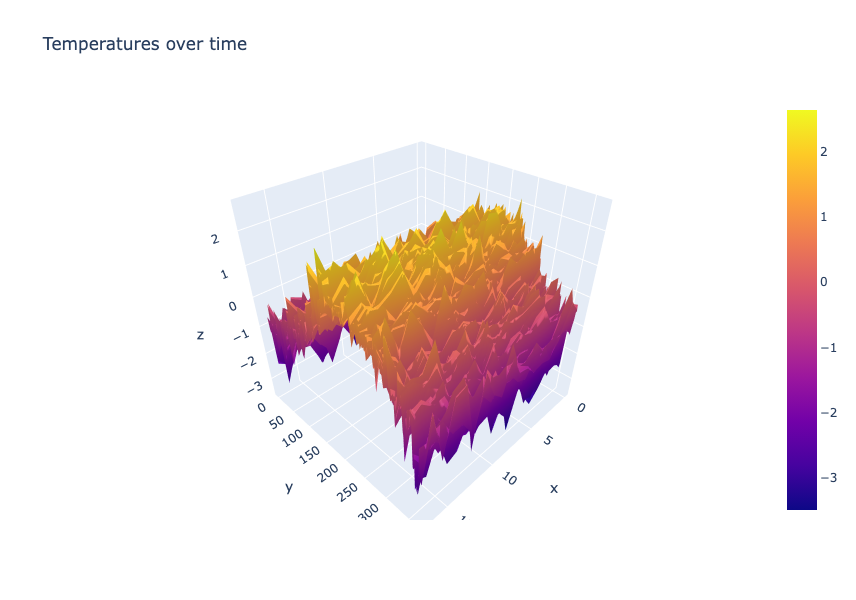

In [211]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

fig2009 = go.Figure(data=[go.Surface(z=df_2009.values)])
fig2009.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig2009.show()

### Stockholm 2009

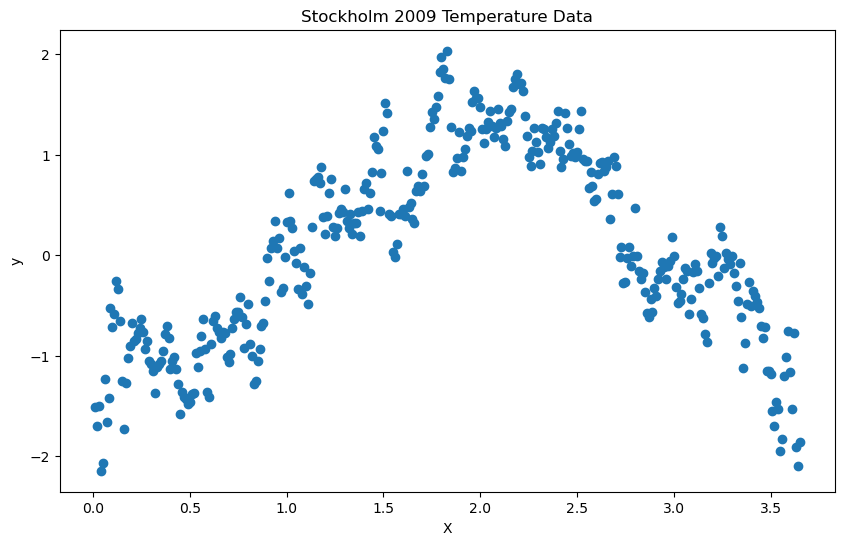

In [215]:
# This will translate your chosen weather data into the X and y datasets needed for the optimization function.
X = index.to_numpy().reshape(n_rows, 1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)
y = df_2009['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows, 1)

# Look at one year of temperature data over time
plt.figure(figsize=(10, 6))
plt.scatter(x=index['index'], y=df_2009['STOCKHOLM_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Stockholm 2009 Temperature Data');
plt.show()

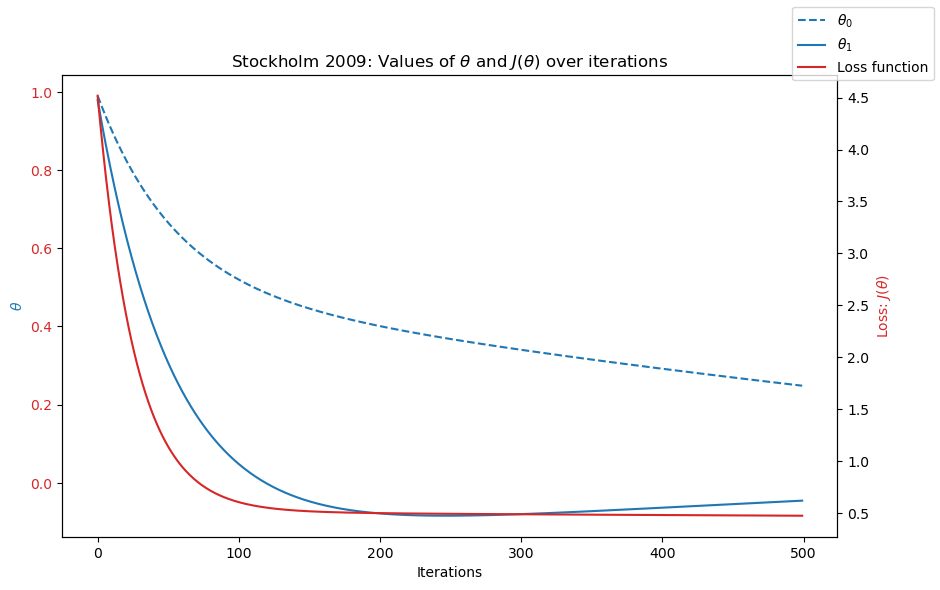

Final theta values for Stockholm 2009: theta0 = 0.24840996475427132, theta1 = -0.045660452702892006
Final loss value: 0.4737554680712521
CPU times: user 519 ms, sys: 22.6 ms, total: 542 ms
Wall time: 352 ms


In [217]:
%%time
# This runs your data through a gradient descent for the starting conditions in 'theta_init.'
num_iterations = 500
theta_init = np.array([[1], [1]])
alpha = 0.0035
theta, J_history, theta0_history, theta1_history = gradient_descent(X, y, theta_init,
                                                                   alpha, num_iterations)

# Plot the optimization results
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot thetas over time
color = 'tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)
# plot loss function over time
color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Stockholm 2009: Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.legend();
plt.show()

print(f"Final theta values for Stockholm 2009: theta0 = {theta[0][0]}, theta1 = {theta[1][0]}")
print(f"Final loss value: {J_history[-1]}")

### Madrid 2009

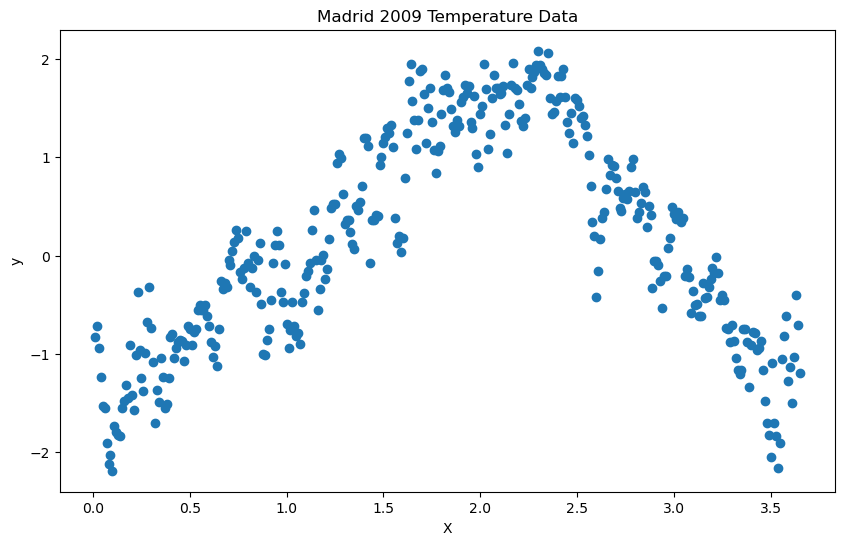

In [221]:
# This will translate your chosen weather data into the X and y datasets needed for the optimization function.
X = index.to_numpy().reshape(n_rows, 1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)
y = df_2009['MADRID_temp_mean'].to_numpy().reshape(n_rows, 1)

# Look at one year of temperature data over time
plt.figure(figsize=(10, 6))
plt.scatter(x=index['index'], y=df_2009['MADRID_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Madrid 2009 Temperature Data');
plt.show()

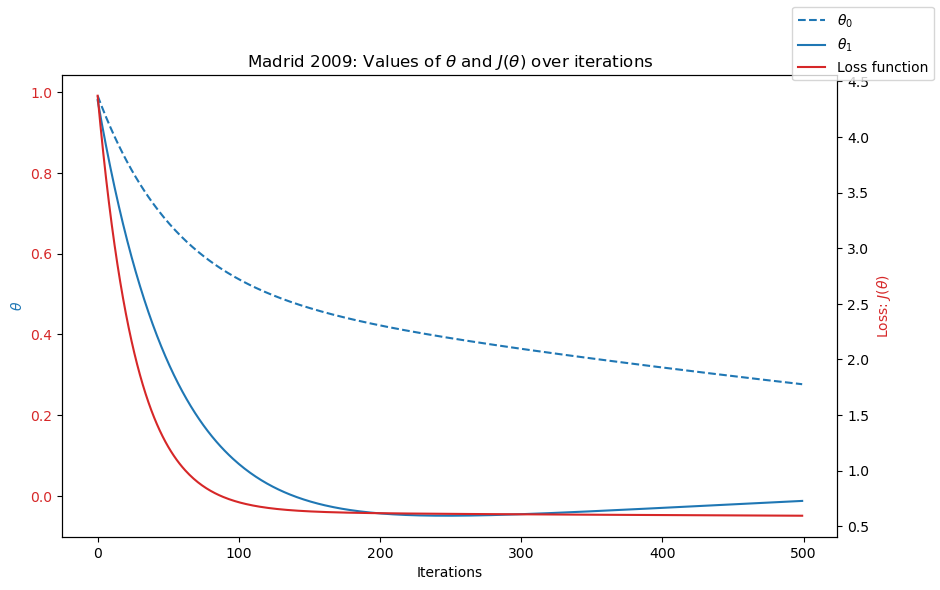

Final theta values for Madrid 2009: theta0 = 0.2767874573933906, theta1 = -0.011952114595041053
Final loss value: 0.5943903898463537
CPU times: user 495 ms, sys: 25.7 ms, total: 520 ms
Wall time: 392 ms


In [223]:
%%time
# This runs your data through a gradient descent for the starting conditions in 'theta_init.'
num_iterations = 500
theta_init = np.array([[1], [1]])
alpha = 0.0035
theta, J_history, theta0_history, theta1_history = gradient_descent(X, y, theta_init,
                                                                   alpha, num_iterations)

# Plot the optimization results
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot thetas over time
color = 'tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)
# plot loss function over time
color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Madrid 2009: Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.legend();
plt.show()

print(f"Final theta values for Madrid 2009: theta0 = {theta[0][0]}, theta1 = {theta[1][0]}")
print(f"Final loss value: {J_history[-1]}")

### Heathrow 2009

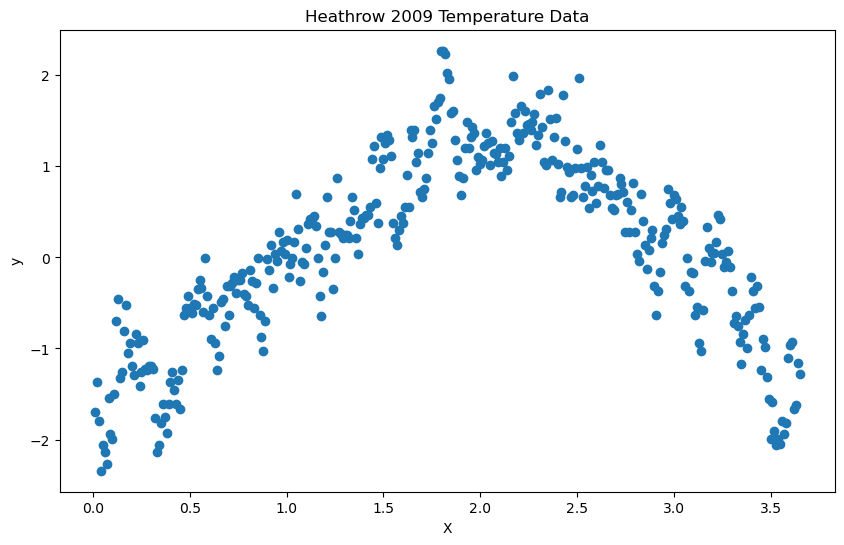

In [227]:
# This will translate your chosen weather data into the X and y datasets needed for the optimization function.
X = index.to_numpy().reshape(n_rows, 1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)
y = df_2009['HEATHROW_temp_mean'].to_numpy().reshape(n_rows, 1)

# Look at one year of temperature data over time
plt.figure(figsize=(10, 6))
plt.scatter(x=index['index'], y=df_2009['HEATHROW_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Heathrow 2009 Temperature Data');
plt.show()

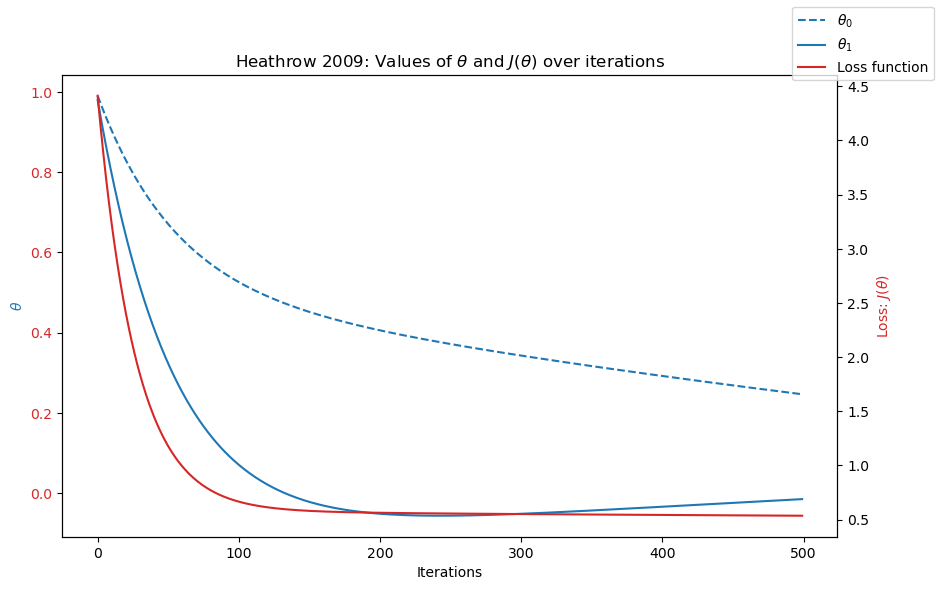

Final theta values for Heathrow 2009: theta0 = 0.24632553968414977, theta1 = -0.015054771817069379
Final loss value: 0.5359039817882523
CPU times: user 478 ms, sys: 23.7 ms, total: 502 ms
Wall time: 398 ms


In [229]:
%%time
# This runs your data through a gradient descent for the starting conditions in 'theta_init.'
num_iterations = 500
theta_init = np.array([[1], [1]])
alpha = 0.0035
theta, J_history, theta0_history, theta1_history = gradient_descent(X, y, theta_init,
                                                                   alpha, num_iterations)

# Plot the optimization results
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot thetas over time
color = 'tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)
# plot loss function over time
color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Heathrow 2009: Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.legend();
plt.show()

print(f"Final theta values for Heathrow 2009: theta0 = {theta[0][0]}, theta1 = {theta[1][0]}")
print(f"Final loss value: {J_history[-1]}")

## 5. 1999 Visualizations (Includes Summary of all Cities/Years)

=== 2019 ANALYSIS ===


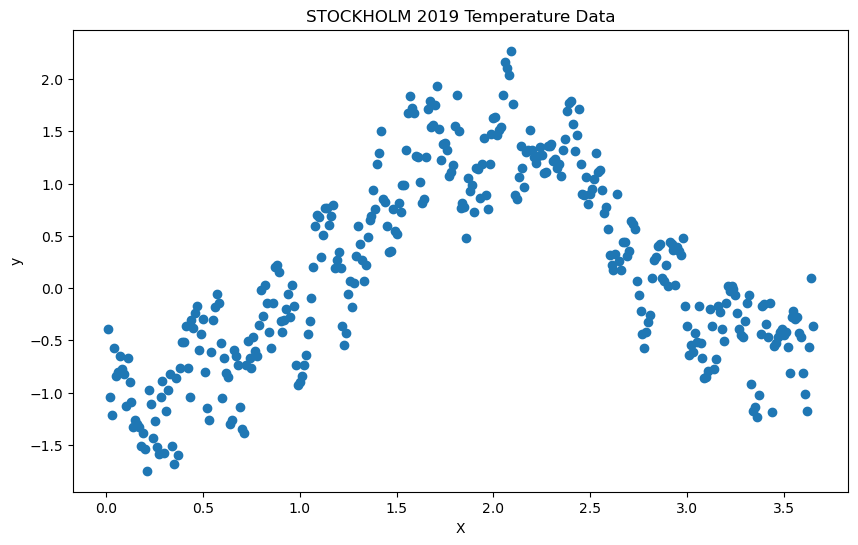

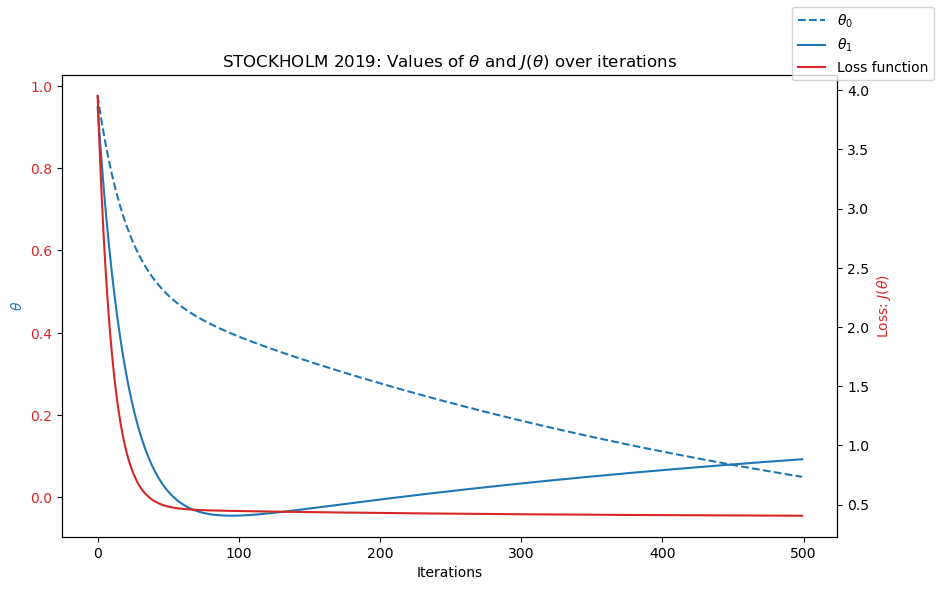

Final theta values for STOCKHOLM 2019: theta0 = 0.0498, theta1 = 0.0926
Final loss value: 0.4066


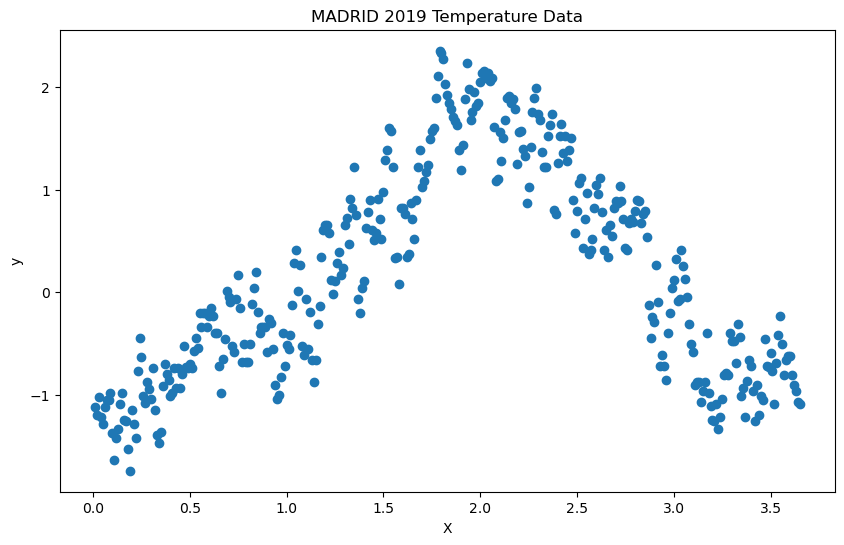

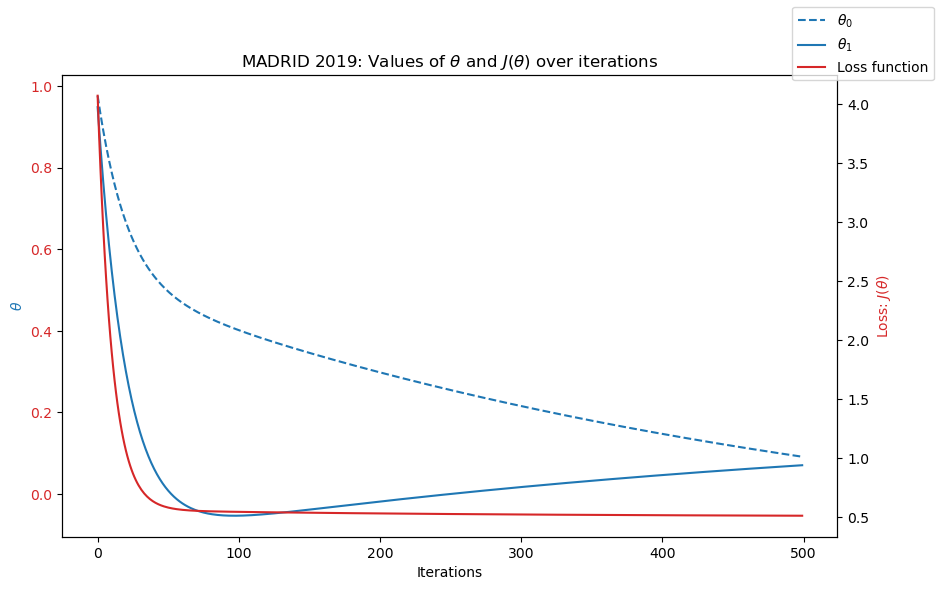

Final theta values for MADRID 2019: theta0 = 0.0913, theta1 = 0.0704
Final loss value: 0.5144


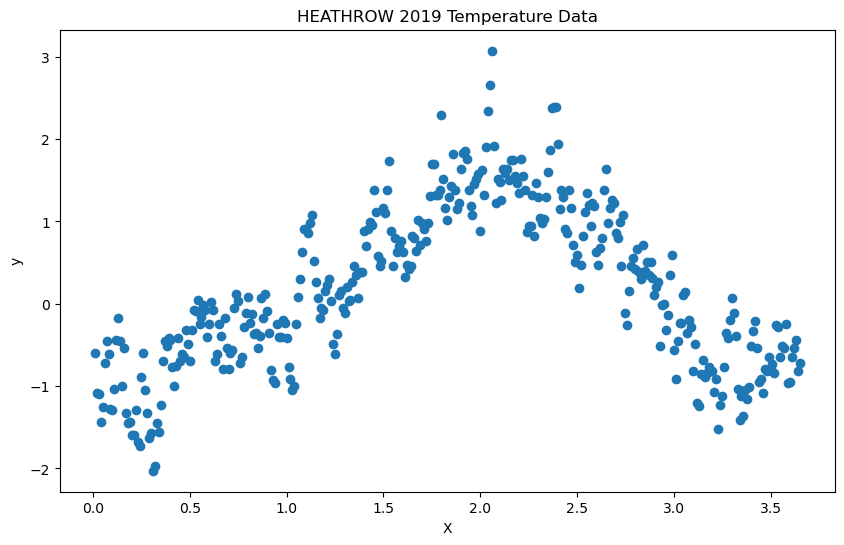

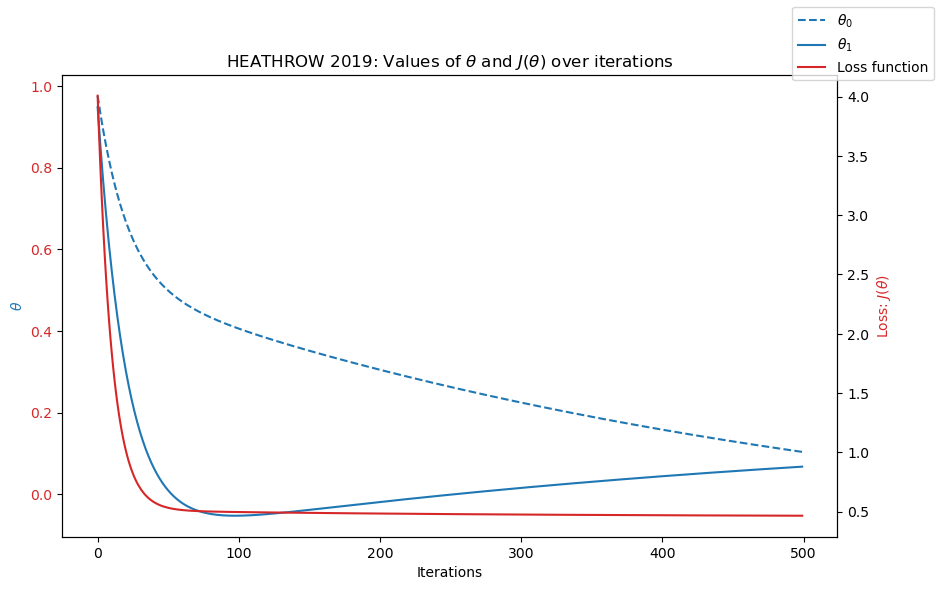

Final theta values for HEATHROW 2019: theta0 = 0.1038, theta1 = 0.0676
Final loss value: 0.4654

=== 2009 ANALYSIS ===


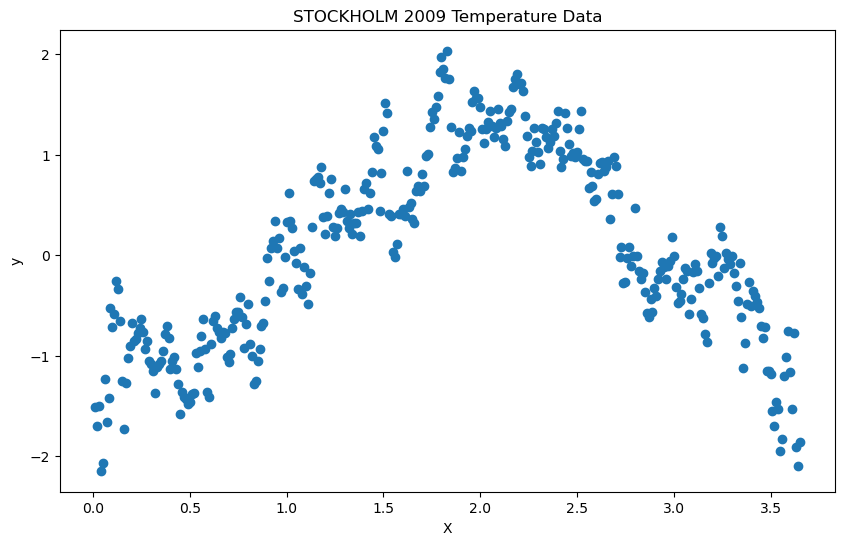

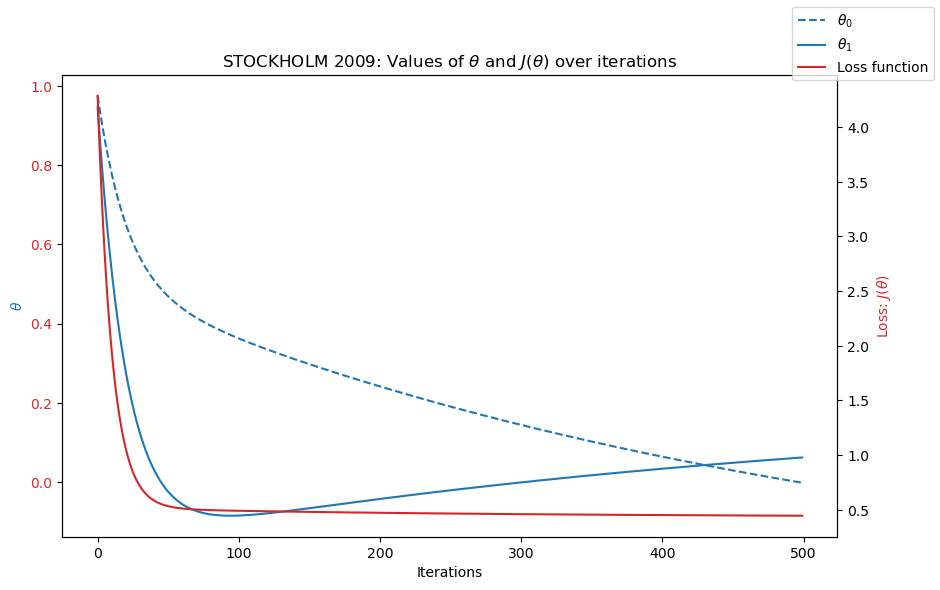

Final theta values for STOCKHOLM 2009: theta0 = -0.0018, theta1 = 0.0620
Final loss value: 0.4461


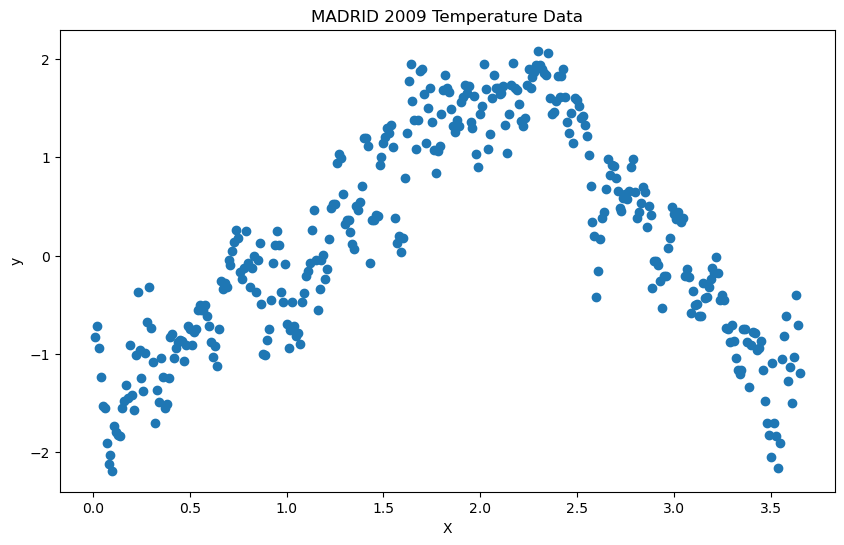

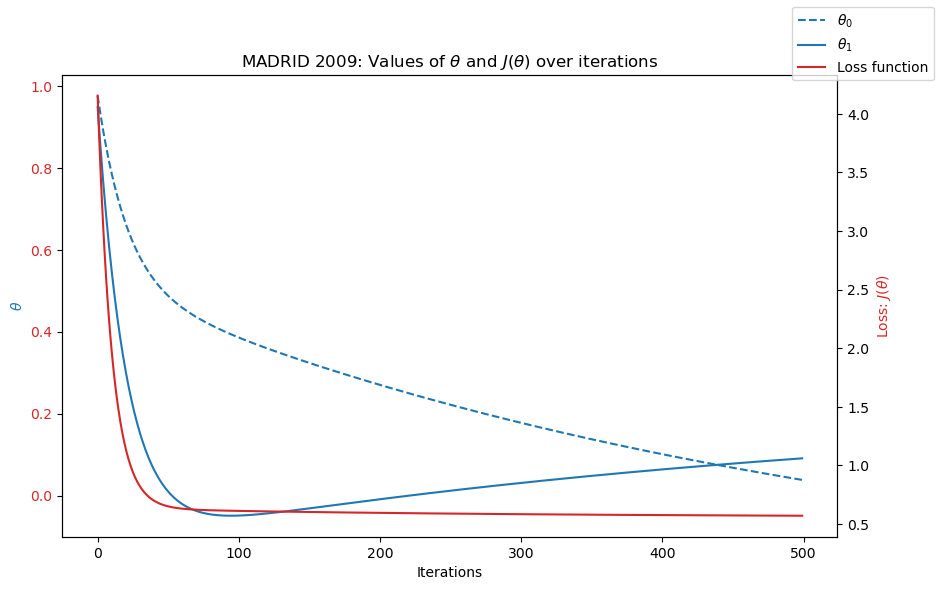

Final theta values for MADRID 2009: theta0 = 0.0381, theta1 = 0.0907
Final loss value: 0.5692


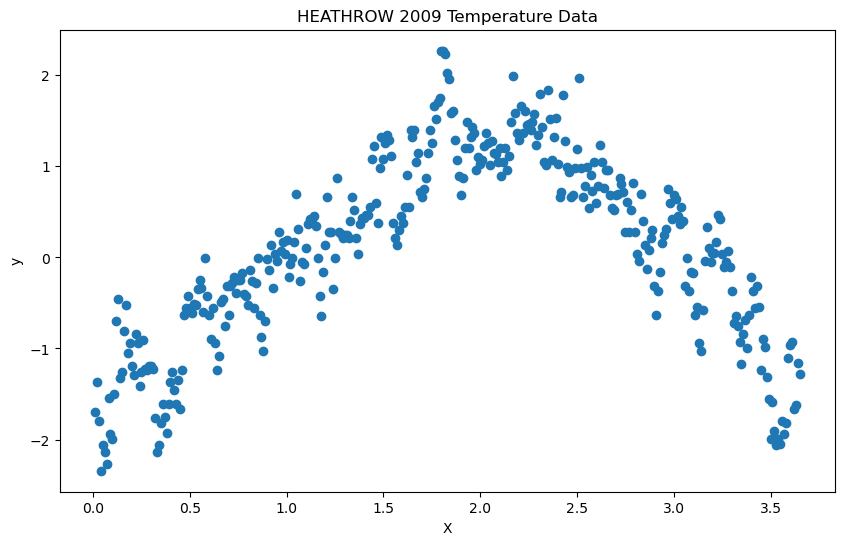

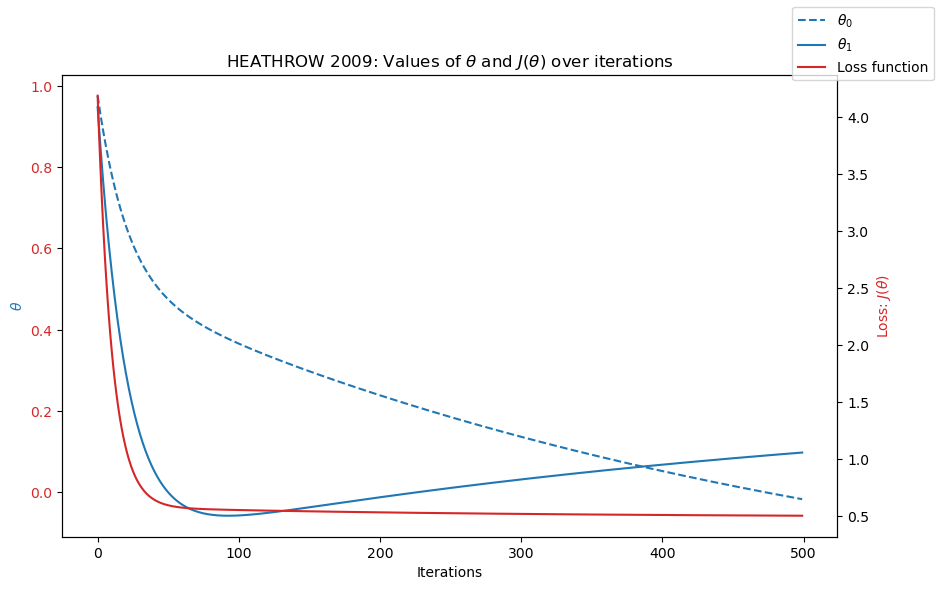

Final theta values for HEATHROW 2009: theta0 = -0.0165, theta1 = 0.0981
Final loss value: 0.5053

=== 1999 ANALYSIS ===


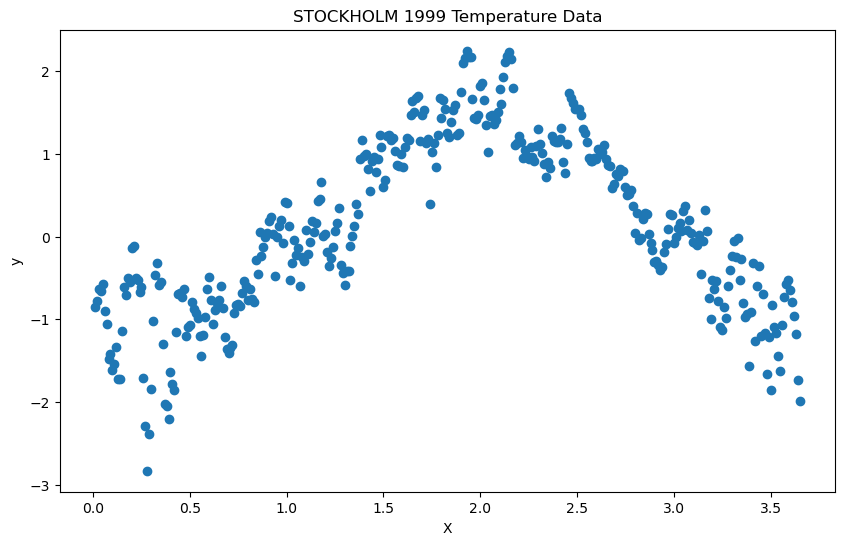

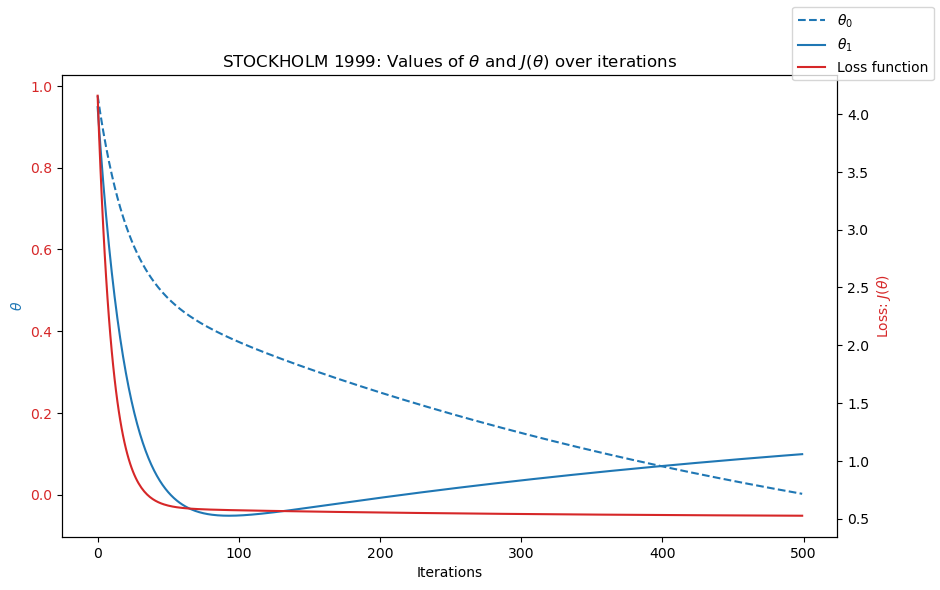

Final theta values for STOCKHOLM 1999: theta0 = 0.0020, theta1 = 0.0990
Final loss value: 0.5251


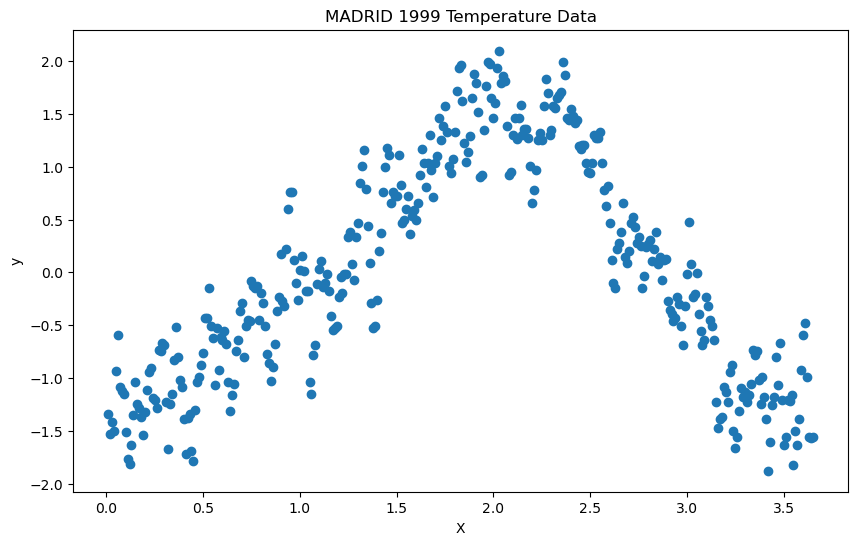

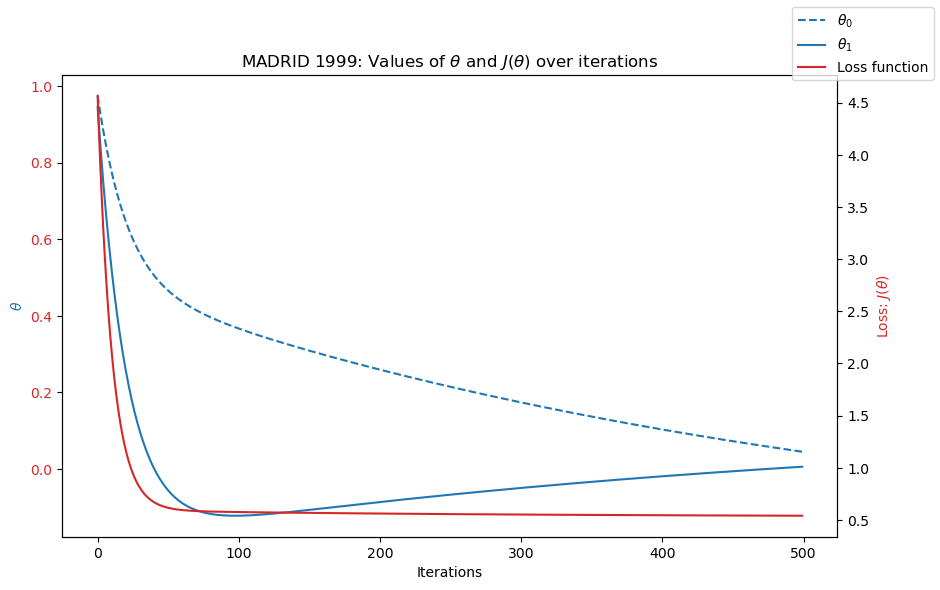

Final theta values for MADRID 1999: theta0 = 0.0451, theta1 = 0.0058
Final loss value: 0.5408


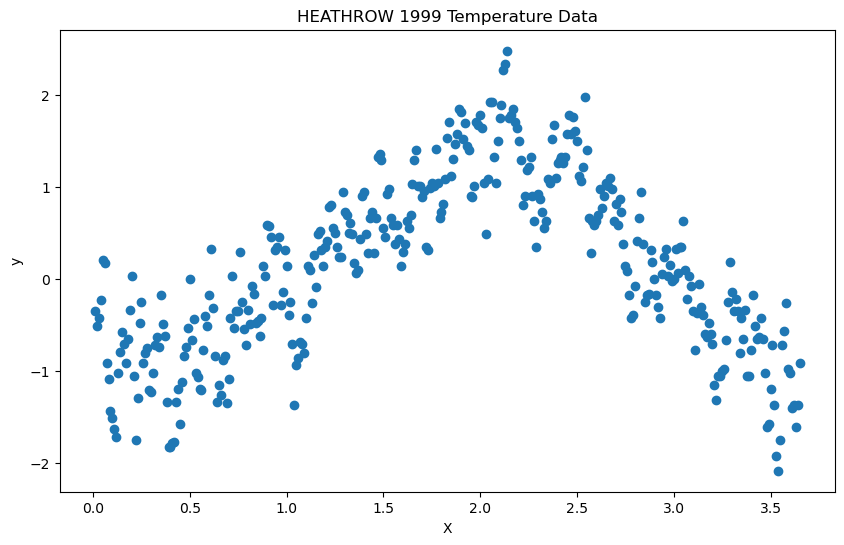

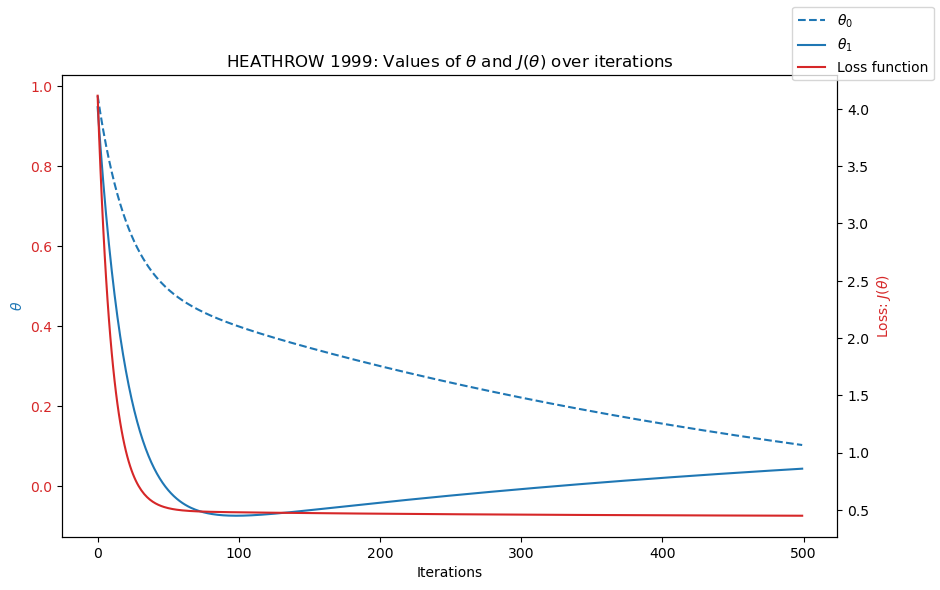

Final theta values for HEATHROW 1999: theta0 = 0.1034, theta1 = 0.0442
Final loss value: 0.4491

=== SUMMARY OF ALL RESULTS ===
        city  year    theta0    theta1  final_loss
0  STOCKHOLM  2019  0.049822  0.092621    0.406551
1     MADRID  2019  0.091318  0.070421    0.514415
2   HEATHROW  2019  0.103755  0.067565    0.465391
3  STOCKHOLM  2009 -0.001762  0.061994    0.446061
4     MADRID  2009  0.038127  0.090747    0.569186
5   HEATHROW  2009 -0.016531  0.098068    0.505329
6  STOCKHOLM  1999  0.002039  0.098990    0.525117
7     MADRID  1999  0.045070  0.005830    0.540763
8   HEATHROW  1999  0.103351  0.044230    0.449068


In [238]:
# Create index once (same for all analyses)
i = np.arange(0.01, 3.66, 0.01)
index = pd.DataFrame(data=i, columns=['index'])

# Function to run analysis for a city and year
def analyze_city_temperature(year_df, city_name, year):
    # Get number of rows
    n_rows = year_df.shape[0]
    
    # Set up X data (same for all cities in same year)
    X = index.to_numpy().reshape(n_rows, 1)
    ones = np.ones((n_rows, 1))
    X = np.concatenate((ones, X), axis=1)
    
    # Get y data for this specific city
    column_name = f"{city_name}_temp_mean"
    y = year_df[column_name].to_numpy().reshape(n_rows, 1)
    
    # Plot the temperature data
    plt.figure(figsize=(10, 6))
    plt.scatter(x=index['index'], y=year_df[column_name])
    plt.xlabel('X'); plt.ylabel('y');
    plt.title(f'{city_name} {year} Temperature Data');
    plt.show()
    
    # Run gradient descent
    num_iterations = 500
    theta_init = np.array([[1], [1]])
    alpha = 0.009
    theta, J_history, theta0_history, theta1_history = gradient_descent(X, y, theta_init,
                                                                        alpha, num_iterations)
    
    # Plot the optimization results
    fig, ax1 = plt.subplots(figsize=(10, 6))
    # plot thetas over time
    color = 'tab:blue'
    ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
    ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
    ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
    ax1.tick_params(axis='y', labelcolor=color)
    # plot loss function over time
    color = 'tab:red'
    ax2 = ax1.twinx()
    ax2.plot(J_history, label='Loss function', color=color)
    ax2.set_title(f'{city_name} {year}: Values of $\\theta$ and $J(\\theta)$ over iterations')
    ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    fig.legend();
    plt.show()
    
    # Print final values
    print(f"Final theta values for {city_name} {year}: theta0 = {theta[0][0]:.4f}, theta1 = {theta[1][0]:.4f}")
    print(f"Final loss value: {J_history[-1]:.4f}")
    
    # Return the results
    return {
        'city': city_name,
        'year': year,
        'theta0': theta[0][0],
        'theta1': theta[1][0],
        'final_loss': J_history[-1]
    }

# Define cities to analyze
cities = ["STOCKHOLM", "MADRID", "HEATHROW"]

# Analyze 2019 data
print("=== 2019 ANALYSIS ===")
results_2019 = []
for city in cities:
    result = analyze_city_temperature(df_2019, city, 2019)
    results_2019.append(result)

# Analyze 2009 data
print("\n=== 2009 ANALYSIS ===")
results_2009 = []
for city in cities:
    result = analyze_city_temperature(df_2009, city, 2009)
    results_2009.append(result)

# Analyze 1999 data
print("\n=== 1999 ANALYSIS ===")
results_1999 = []
for city in cities:
    result = analyze_city_temperature(df_1999, city, 1999)
    results_1999.append(result)

# Collect all results for easy comparison
all_results = results_2019 + results_2009 + results_1999

# Display summary table of all results
results_df = pd.DataFrame(all_results)
print("\n=== SUMMARY OF ALL RESULTS ===")
print(results_df)